In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [2]:
df1 = pd.read_csv("scaled_combo_features.csv")

In [3]:
df1

,fk_grade_level_TA,arousal..ANEW._TA,dominance..ANEW._TA,valence..ANEW._TA,concreteness_TA,familiarity_TA,emotionality_TA,extremity_TA,valence..EL._TA,SENT_TA,...,Apology,Truth.Intensifier,Affirmation,Adverb.Limiter,Conjunction.Start,num_ratings,mturk_rating,apology,Brand,Label
0,-0.102348,0.236255,-0.449482,-0.270067,-0.048619,-0.213981,-0.245553,0.208970,-0.152049,1.158130,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,3,20.333333,True,Marriot,1
1,1.996280,-2.096391,-1.892456,-1.995635,-0.673987,-0.445584,0.017646,1.125400,1.034104,0.265167,...,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,3,-14.000000,False,Marriot,0
2,-0.326828,-0.817639,-1.014791,-0.972723,-1.041318,-2.005196,0.161258,0.152088,0.548454,1.254169,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,4,27.500000,True,Marriot,1
3,-0.164994,0.448802,0.192798,-0.122658,0.077128,0.058662,-0.119180,0.177369,0.150165,0.530398,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,30.000000,True,Marriot,1
4,0.283967,-0.356943,-0.514192,-0.570311,-0.585222,0.622655,-2.591543,-2.180069,-2.365444,-1.367783,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,23.750000,True,Marriot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.163896,-0.437463,-0.126961,0.194413,-0.006054,-0.242194,-0.031763,0.929474,0.946136,0.168235,...,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,6,28.333333,True,Al Bahar,1
776,4.032262,0.180420,0.382369,0.363857,0.626145,0.740951,0.006362,0.174604,-0.069046,-0.811428,...,0.313581,-0.208046,-0.157909,5.799783,4.603844,7,10.857143,True,enVision,1
777,-0.264182,-0.123105,-0.395721,-0.624033,0.615252,-0.842475,0.139269,0.057285,-1.454547,-0.126403,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,11,26.272727,True,enVision,1
778,-0.201537,-0.754977,-1.145291,-1.338336,0.284510,0.013399,-2.591543,-2.180069,-2.365444,-0.761686,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,19.500000,True,enVision,1


In [4]:
## lasso - logistics - label - all features

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_data = df1[df1.columns[:-5]]
y_data = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [7]:
rating = df1.iloc[X_train.index].mturk_rating

In [10]:
y_test_rating = df1.iloc[X_test.index].mturk_rating

In [8]:
df_train = X_train
df_train["Label"] = y_train.to_list()
df_train["rating"] = rating

In [9]:
df_train

,fk_grade_level_TA,arousal..ANEW._TA,dominance..ANEW._TA,valence..ANEW._TA,concreteness_TA,familiarity_TA,emotionality_TA,extremity_TA,valence..EL._TA,SENT_TA,...,Bare.Command,YesNo.Questions,Gratitude,Apology,Truth.Intensifier,Affirmation,Adverb.Limiter,Conjunction.Start,Label,rating
283,-0.833213,-0.649384,-0.323795,-0.275450,-0.684705,1.001319,-0.074521,1.104860,1.024882,-0.033086,...,-0.199872,-0.07175,0.750244,0.313581,-0.208046,-0.157909,-0.284724,4.603844,1,30.000000
342,-0.608733,-0.042728,0.125908,0.070731,0.700434,-1.547554,1.208219,-0.203424,0.267219,0.477450,...,4.996794,-0.07175,-0.434352,0.313581,4.299617,-0.157909,-0.284724,-0.390590,1,26.714286
176,-0.426017,1.736399,1.564921,1.628360,-0.250898,1.017667,0.270393,-0.430951,0.165063,-0.080203,...,-0.199872,-0.07175,-0.434352,0.313581,-0.208046,-0.157909,-0.284724,2.106627,1,21.454545
332,-1.323937,1.363754,1.598987,1.051589,0.827444,0.235395,-2.591543,-2.180069,-2.365444,0.237106,...,-0.199872,-0.07175,-1.618947,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,0,-17.500000
707,1.343721,0.884674,0.898605,0.880449,0.298140,-0.232255,0.808194,0.901033,0.065034,0.462924,...,-0.199872,-0.07175,0.750244,-1.022993,-0.208046,-0.157909,2.757530,-0.390590,1,2.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,0.550210,0.709223,0.812881,0.994315,1.611211,-0.936057,-0.781454,0.486269,0.410877,0.353288,...,-0.199872,-0.07175,0.750244,0.313581,-0.208046,-0.157909,2.757530,-0.390590,1,24.600000
153,-0.180655,0.402917,-0.003754,-0.141507,-1.118091,-1.156792,0.333105,-0.345628,0.373633,0.520589,...,-0.199872,-0.07175,-0.434352,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,1,22.600000
109,0.242203,0.096820,-0.090983,-0.170615,-0.668895,1.420822,1.068543,-1.516447,-0.152049,-1.247831,...,-0.199872,-0.07175,0.750244,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,1,16.000000
430,1.239312,-1.130029,-1.267402,-1.282124,-0.647861,1.129101,1.268080,0.875752,0.153003,-0.761971,...,-0.199872,-0.07175,-0.434352,-1.022993,-0.208046,-0.157909,5.799783,2.106627,0,-9.142857


In [11]:
df_top_pos = df_train[df_train["Label"] == 1]
df_top_neg = df_train[df_train["Label"] == 0]

In [12]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(467, 179)


In [13]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [14]:
data_upsampled

,fk_grade_level_TA,arousal..ANEW._TA,dominance..ANEW._TA,valence..ANEW._TA,concreteness_TA,familiarity_TA,emotionality_TA,extremity_TA,valence..EL._TA,SENT_TA,...,Bare.Command,YesNo.Questions,Gratitude,Apology,Truth.Intensifier,Affirmation,Adverb.Limiter,Conjunction.Start,Label,rating
283,-0.833213,-0.649384,-0.323795,-0.275450,-0.684705,1.001319,-0.074521,1.104860,1.024882,-0.033086,...,-0.199872,-0.07175,0.750244,0.313581,-0.208046,-0.157909,-0.284724,4.603844,1,30.000000
342,-0.608733,-0.042728,0.125908,0.070731,0.700434,-1.547554,1.208219,-0.203424,0.267219,0.477450,...,4.996794,-0.07175,-0.434352,0.313581,4.299617,-0.157909,-0.284724,-0.390590,1,26.714286
176,-0.426017,1.736399,1.564921,1.628360,-0.250898,1.017667,0.270393,-0.430951,0.165063,-0.080203,...,-0.199872,-0.07175,-0.434352,0.313581,-0.208046,-0.157909,-0.284724,2.106627,1,21.454545
707,1.343721,0.884674,0.898605,0.880449,0.298140,-0.232255,0.808194,0.901033,0.065034,0.462924,...,-0.199872,-0.07175,0.750244,-1.022993,-0.208046,-0.157909,2.757530,-0.390590,1,2.750000
234,2.627956,1.390711,1.361523,1.398701,0.750868,-0.472326,0.367311,0.332214,0.487039,0.133089,...,-0.199872,-0.07175,-0.434352,-1.022993,-0.208046,-0.157909,-0.284724,2.106627,1,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,-0.426017,0.451593,0.700890,0.945800,0.726932,-1.525512,0.589653,0.962655,0.961034,1.229735,...,-0.199872,-0.07175,0.750244,-1.022993,-0.208046,6.324657,-0.284724,-0.390590,0,-27.500000
163,0.122132,1.241313,0.735001,1.105533,1.371226,-0.073527,-0.470746,0.531301,0.767362,1.848980,...,-0.199872,-0.07175,0.750244,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,0,-10.714286
337,-0.734024,-0.598020,-0.393732,-0.316873,-0.970772,1.015759,1.062841,0.417537,-1.616295,-0.891043,...,-0.199872,-0.07175,-1.618947,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,0,-8.250000
692,2.079807,0.315033,0.505666,0.446123,0.169574,-0.444233,0.034749,0.234251,-0.733774,0.026811,...,-0.199872,-0.07175,-0.434352,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,0,-8.333333


In [15]:
X_train1 = data_upsampled[data_upsampled.columns[:-2]]
y_train1 = data_upsampled["Label"]

In [16]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear", penalty ="l1").fit(X_train1, y_train1) 

In [17]:
print(cross_val_score(lgclf, X_train1, y_train1, cv=10))

[0.90425532 0.94680851 0.93617021 0.93617021 0.91397849 0.91397849
 0.94623656 0.90322581 0.89247312 0.89247312]


In [18]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.8461538461538461


In [19]:
lgclf.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[21,  5],
       [ 7, 45]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


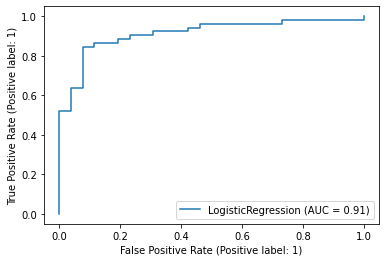

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [22]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lgclf.coef_[0])
coeff_df["Magnitude"] = pd.Series(abs(lgclf.coef_[0]))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [23]:
### what are the textual features that predict apology?

In [24]:
df_feature

,Features,Coefficient,Magnitude
128,focuspast,0.004468,0.004468
62,allnone,0.005589,0.005589
48,number,-0.007069,0.007069
70,memory,0.007767,0.007767
10,anger_TA,0.009640,0.009640
...,...,...,...
164,Negative.Emotion,1.521107,1.521107
53,negate,1.883073,1.883073
103,health,-2.101997,2.101997
145,Negation,-2.373489,2.373489


In [25]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients.csv")

In [26]:
df_feature = df_feature.set_index("Features")

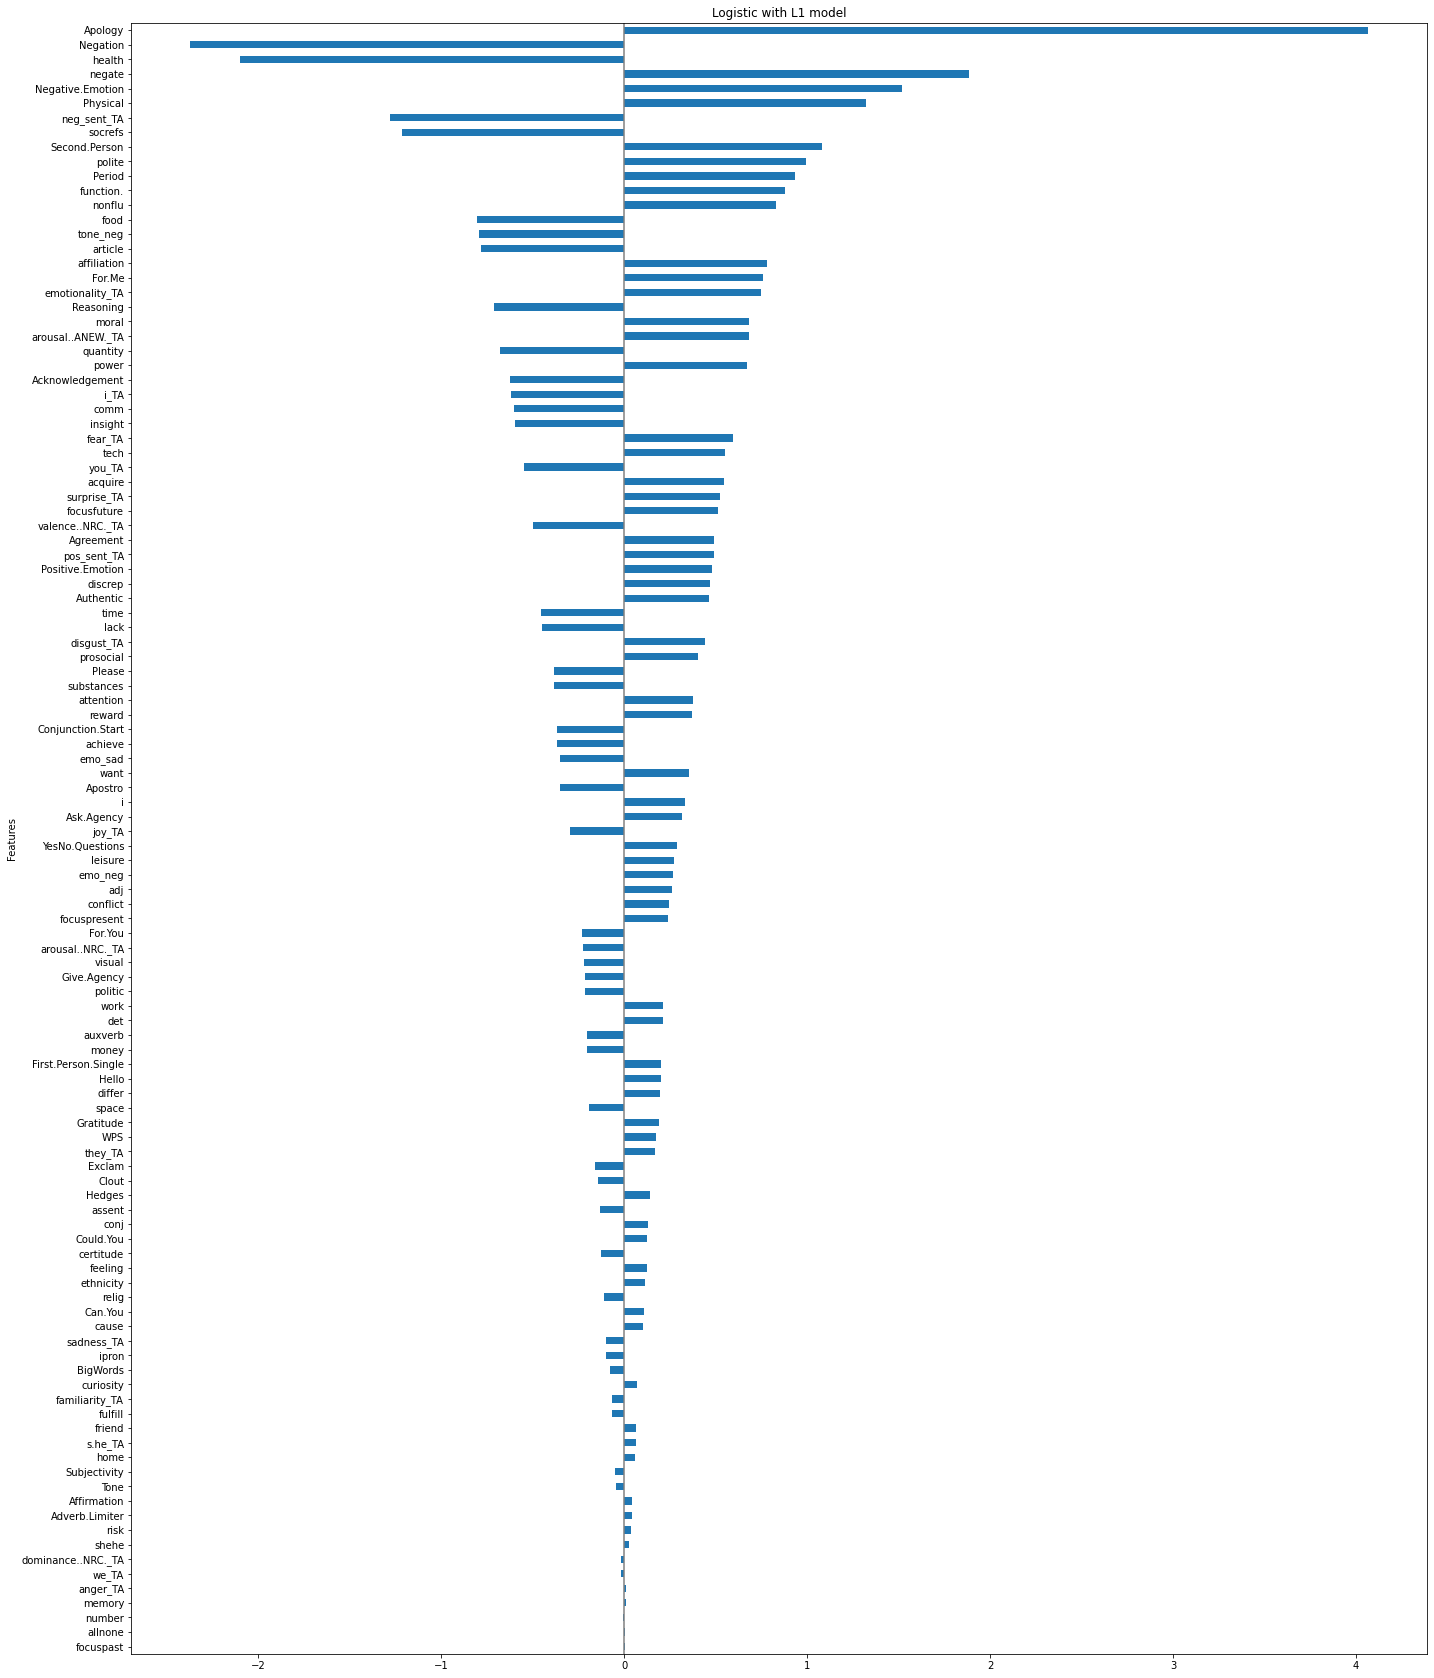

In [27]:
#visualize the feature coefficient
import matplotlib.pyplot as plt

df_feature["Coefficient"].plot(kind='barh', figsize=(30, 30))
plt.title('Logistic with L1 model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [29]:
## logistics with l2 

In [31]:
rgclf = LogisticRegression(random_state=42, fit_intercept = True, penalty ="l2").fit(X_train1, y_train1) 

In [32]:
print(cross_val_score(rgclf, X_train1, y_train1, cv=10))

[0.89361702 0.93617021 0.94680851 0.91489362 0.91397849 0.92473118
 0.92473118 0.90322581 0.90322581 0.90322581]


In [33]:
print("Accuracy Score:",rgclf.score(X_test, y_test))

Accuracy Score: 0.8205128205128205


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rgclf.predict(X_test))

array([[19,  7],
       [ 7, 45]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


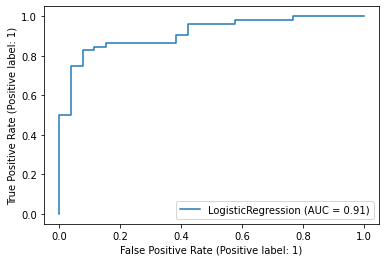

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(rgclf, X_test, y_test)
plt.show()

In [36]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lgclf.coef_[0])
coeff_df["Magnitude"] = pd.Series(abs(lgclf.coef_[0]))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [37]:
df_feature

,Features,Coefficient,Magnitude
128,focuspast,0.004468,0.004468
62,allnone,0.005589,0.005589
48,number,-0.007069,0.007069
70,memory,0.007767,0.007767
10,anger_TA,0.009640,0.009640
...,...,...,...
164,Negative.Emotion,1.521107,1.521107
53,negate,1.883073,1.883073
103,health,-2.101997,2.101997
145,Negation,-2.373489,2.373489


In [38]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ridge.csv")

In [39]:
df_feature = df_feature.set_index("Features")

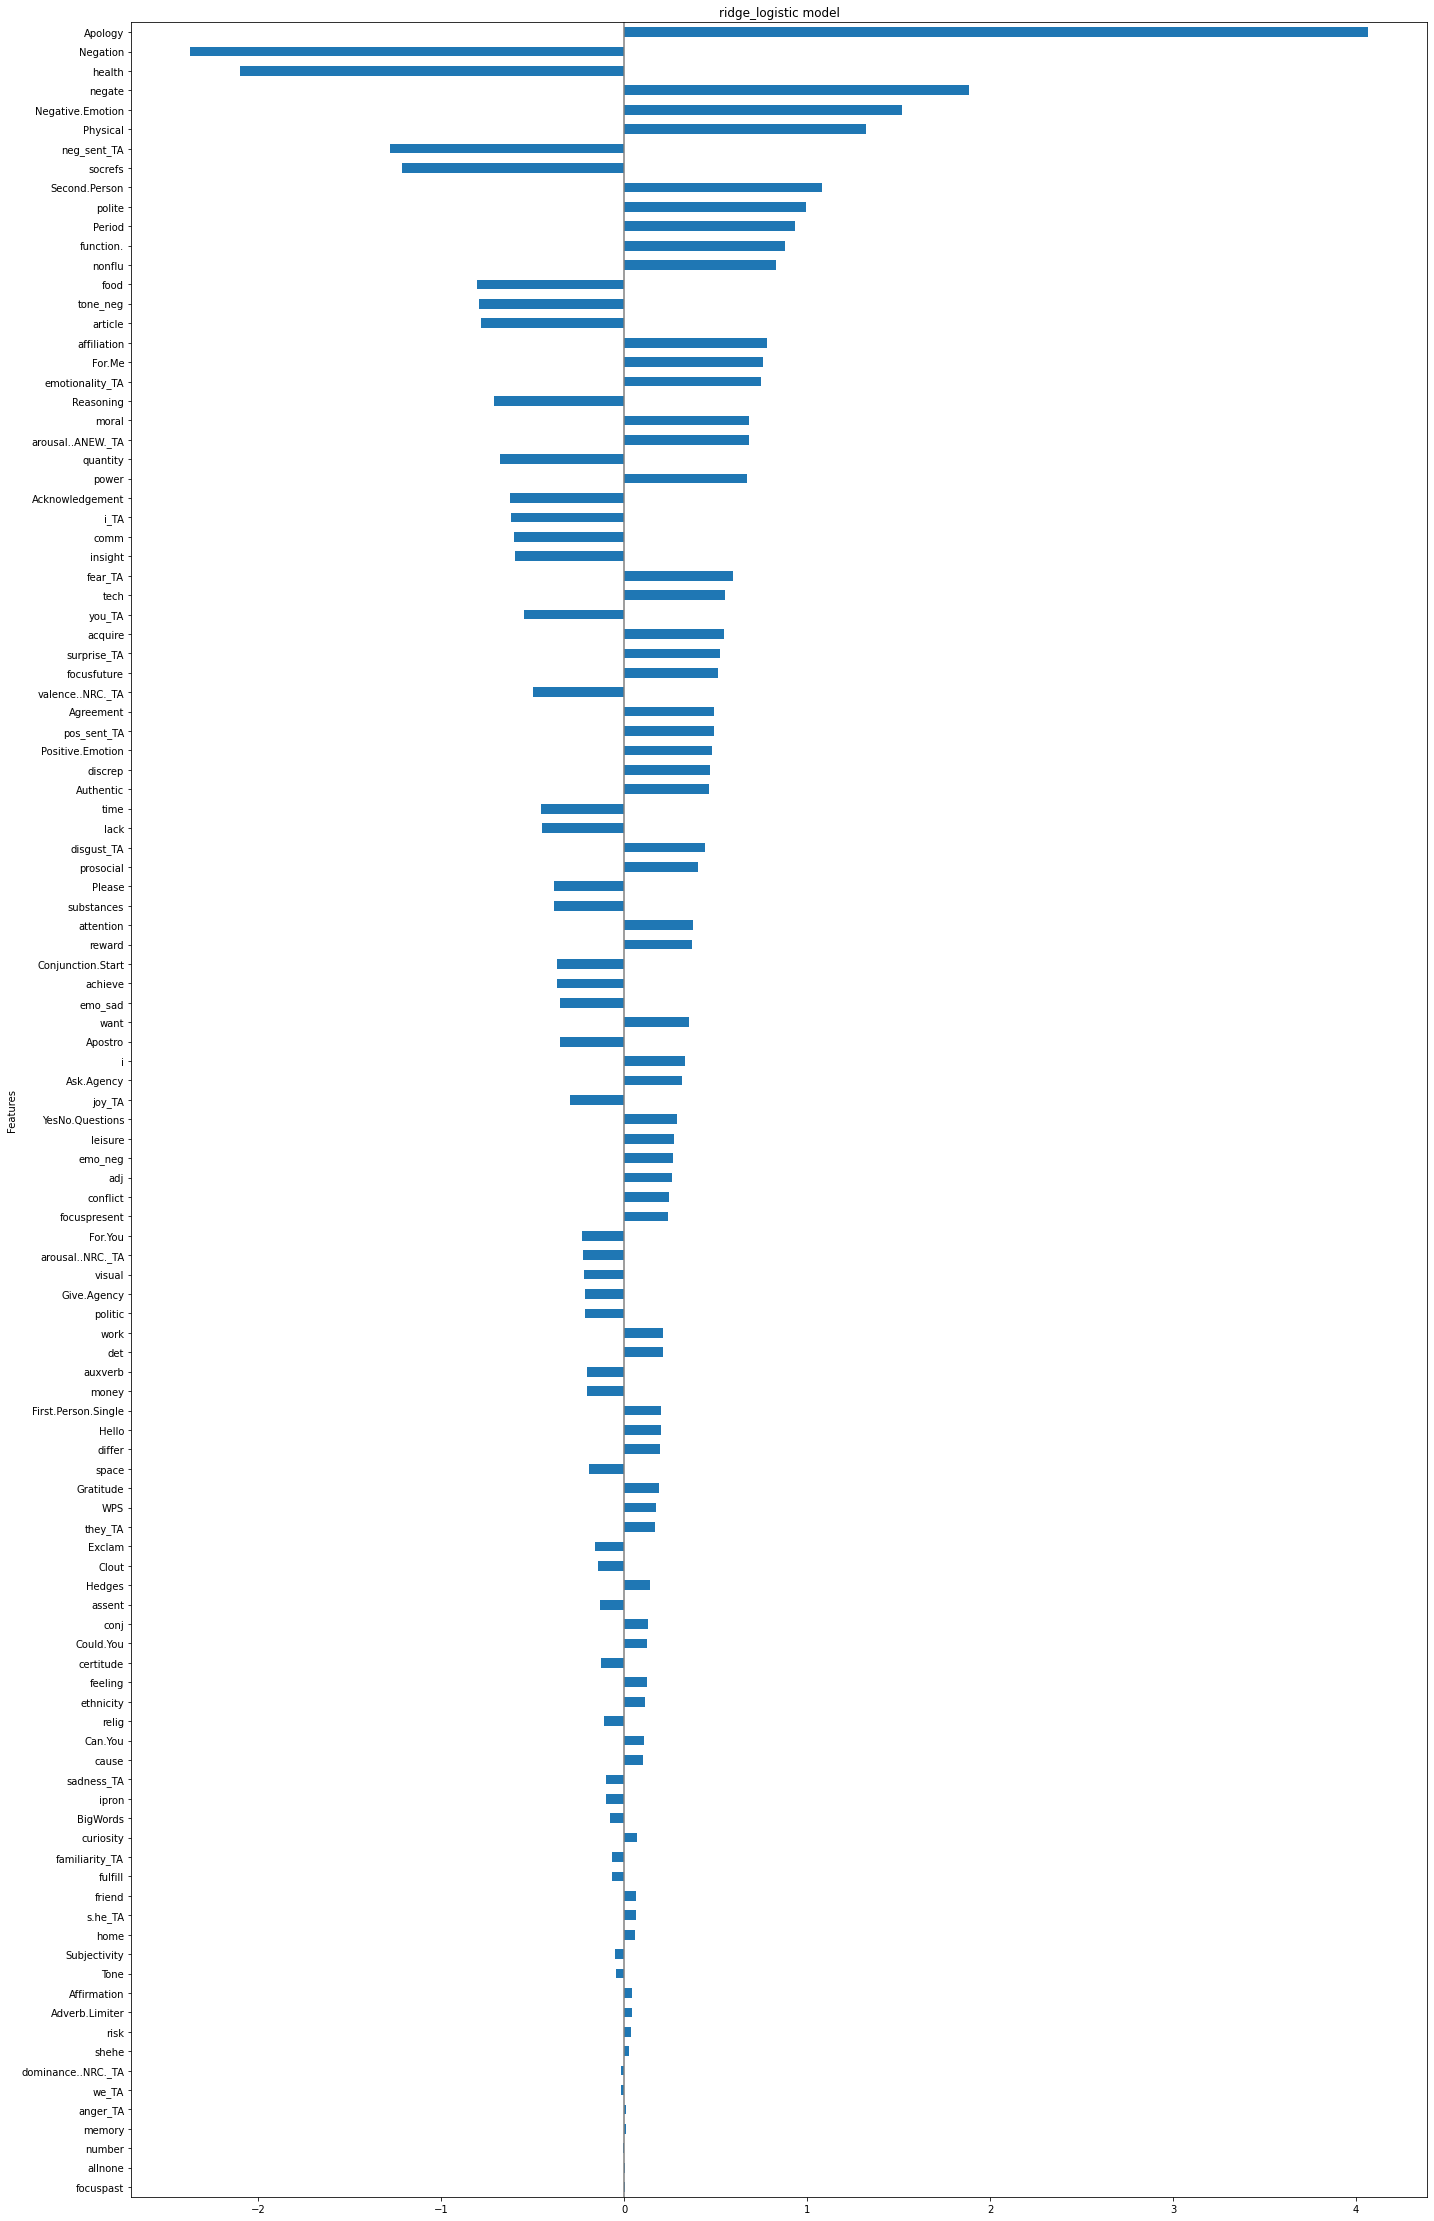

In [40]:
df_feature["Coefficient"].plot(kind='barh', figsize=(30, 40))
plt.title('ridge_logistic model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [41]:
from sklearn.linear_model import LinearRegression

In [58]:
X_data = df1[df1.columns[:-5]]
y_data = df1['mturk_rating']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.1,
                            random_state=42)

In [59]:
X_data

,fk_grade_level_TA,arousal..ANEW._TA,dominance..ANEW._TA,valence..ANEW._TA,concreteness_TA,familiarity_TA,emotionality_TA,extremity_TA,valence..EL._TA,SENT_TA,...,Acknowledgement,Subjectivity,Bare.Command,YesNo.Questions,Gratitude,Apology,Truth.Intensifier,Affirmation,Adverb.Limiter,Conjunction.Start
0,-0.102348,0.236255,-0.449482,-0.270067,-0.048619,-0.213981,-0.245553,0.208970,-0.152049,1.158130,...,-0.266941,-0.119524,-0.199872,-0.07175,0.750244,0.313581,-0.208046,-0.157909,-0.284724,-0.390590
1,1.996280,-2.096391,-1.892456,-1.995635,-0.673987,-0.445584,0.017646,1.125400,1.034104,0.265167,...,3.091350,-0.119524,-0.199872,-0.07175,0.750244,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590
2,-0.326828,-0.817639,-1.014791,-0.972723,-1.041318,-2.005196,0.161258,0.152088,0.548454,1.254169,...,-0.266941,-0.119524,-0.199872,-0.07175,-0.434352,0.313581,-0.208046,-0.157909,-0.284724,-0.390590
3,-0.164994,0.448802,0.192798,-0.122658,0.077128,0.058662,-0.119180,0.177369,0.150165,0.530398,...,-0.266941,-0.119524,-0.199872,-0.07175,-0.434352,1.650154,-0.208046,-0.157909,-0.284724,-0.390590
4,0.283967,-0.356943,-0.514192,-0.570311,-0.585222,0.622655,-2.591543,-2.180069,-2.365444,-1.367783,...,-0.266941,-0.119524,-0.199872,-0.07175,0.750244,1.650154,-0.208046,-0.157909,-0.284724,-0.390590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.163896,-0.437463,-0.126961,0.194413,-0.006054,-0.242194,-0.031763,0.929474,0.946136,0.168235,...,-0.266941,-0.119524,4.996794,-0.07175,-1.618947,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590
776,4.032262,0.180420,0.382369,0.363857,0.626145,0.740951,0.006362,0.174604,-0.069046,-0.811428,...,-0.266941,8.355804,-0.199872,-0.07175,-1.618947,0.313581,-0.208046,-0.157909,5.799783,4.603844
777,-0.264182,-0.123105,-0.395721,-0.624033,0.615252,-0.842475,0.139269,0.057285,-1.454547,-0.126403,...,-0.266941,-0.119524,-0.199872,-0.07175,-1.618947,0.313581,-0.208046,-0.157909,-0.284724,-0.390590
778,-0.201537,-0.754977,-1.145291,-1.338336,0.284510,0.013399,-2.591543,-2.180069,-2.365444,-0.761686,...,-0.266941,-0.119524,-0.199872,-0.07175,-0.434352,1.650154,-0.208046,-0.157909,-0.284724,-0.390590


In [60]:
olsclf = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_rating, olsclf.predict(X_test))

1077.4055765495084

In [62]:
olsclf.predict(X_test)

array([  25.10743331,   -9.09632184,   -6.77574276,  -10.64794788,
         -1.78561282,    9.64242825,   17.85006842,   15.30427594,
       -142.39134094,    9.00565285,    8.78226336,    6.75293115,
         20.40880702,   -6.65757654,   52.25375931,   25.51970822,
         10.46956564,   -2.53335883,   -9.16371264,   31.17317199,
         14.62944788,    3.25623309,   14.34037154,   -4.55337495,
         19.90101793,   14.55744642,  -23.8166055 ,   15.86936435,
          2.35791836,   11.95575449,   23.03273476,   11.73793545,
         25.60028598,   35.91413553,   25.27674304,   30.47735176,
         10.72025954,   13.47085899,  -33.9930859 ,    8.20144217,
          5.12485806,   28.62506457,   31.24963736,   -7.13338442,
          7.04138955,    3.23664584,   26.79944652,    6.23630627,
         23.17237284,   26.55550344,   14.92675065,   36.72925038,
         37.8933302 ,    4.61808545,   23.74809424,    2.59982575,
         47.05218998,   36.12041877,   21.54922193,   20.55219

In [63]:
def match():
    pre_binary = []
    true = []
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * olsclf.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    for i in range(len(y_test)):
        if olsclf.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    print(accuracy)
    return pre_binary, true

In [64]:
pre, true = match()

0.9102564102564102


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pre)

array([[15,  3],
       [ 5, 55]])

In [66]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(olsclf.predict(X_test), y_test)

(0.6298459832241147, 6.499413358145456e-10)

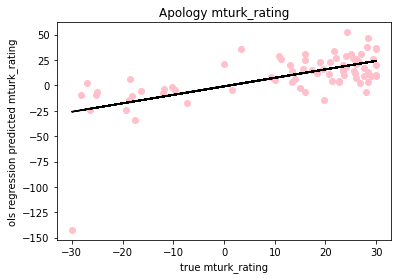

In [67]:
# Visualising the Test set results
theta = np.polyfit(y_test, olsclf.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, olsclf.predict(X_test), color = 'pink')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('ols regression predicted mturk_rating')
plt.show()

In [68]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(olsclf.coef_)
coeff_df["Magnitude"] = pd.Series(abs(olsclf.coef_))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [69]:
df_feature

,Features,Coefficient,Magnitude
146,Filler.Pause,7.985708e-03,7.985708e-03
167,Acknowledgement,-1.781779e-02,1.781779e-02
12,disgust_TA,3.906765e-02,3.906765e-02
65,cause,5.411717e-02,5.411717e-02
90,female,-5.976663e-02,5.976663e-02
...,...,...,...
38,pronoun,-1.706558e+02,1.706558e+02
94,ethnicity,-8.586021e+08,8.586021e+08
93,politic,-1.728177e+09,1.728177e+09
95,tech,-3.173229e+09,3.173229e+09


In [70]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ols.csv")

In [71]:
df_feature = df_feature.set_index("Features")

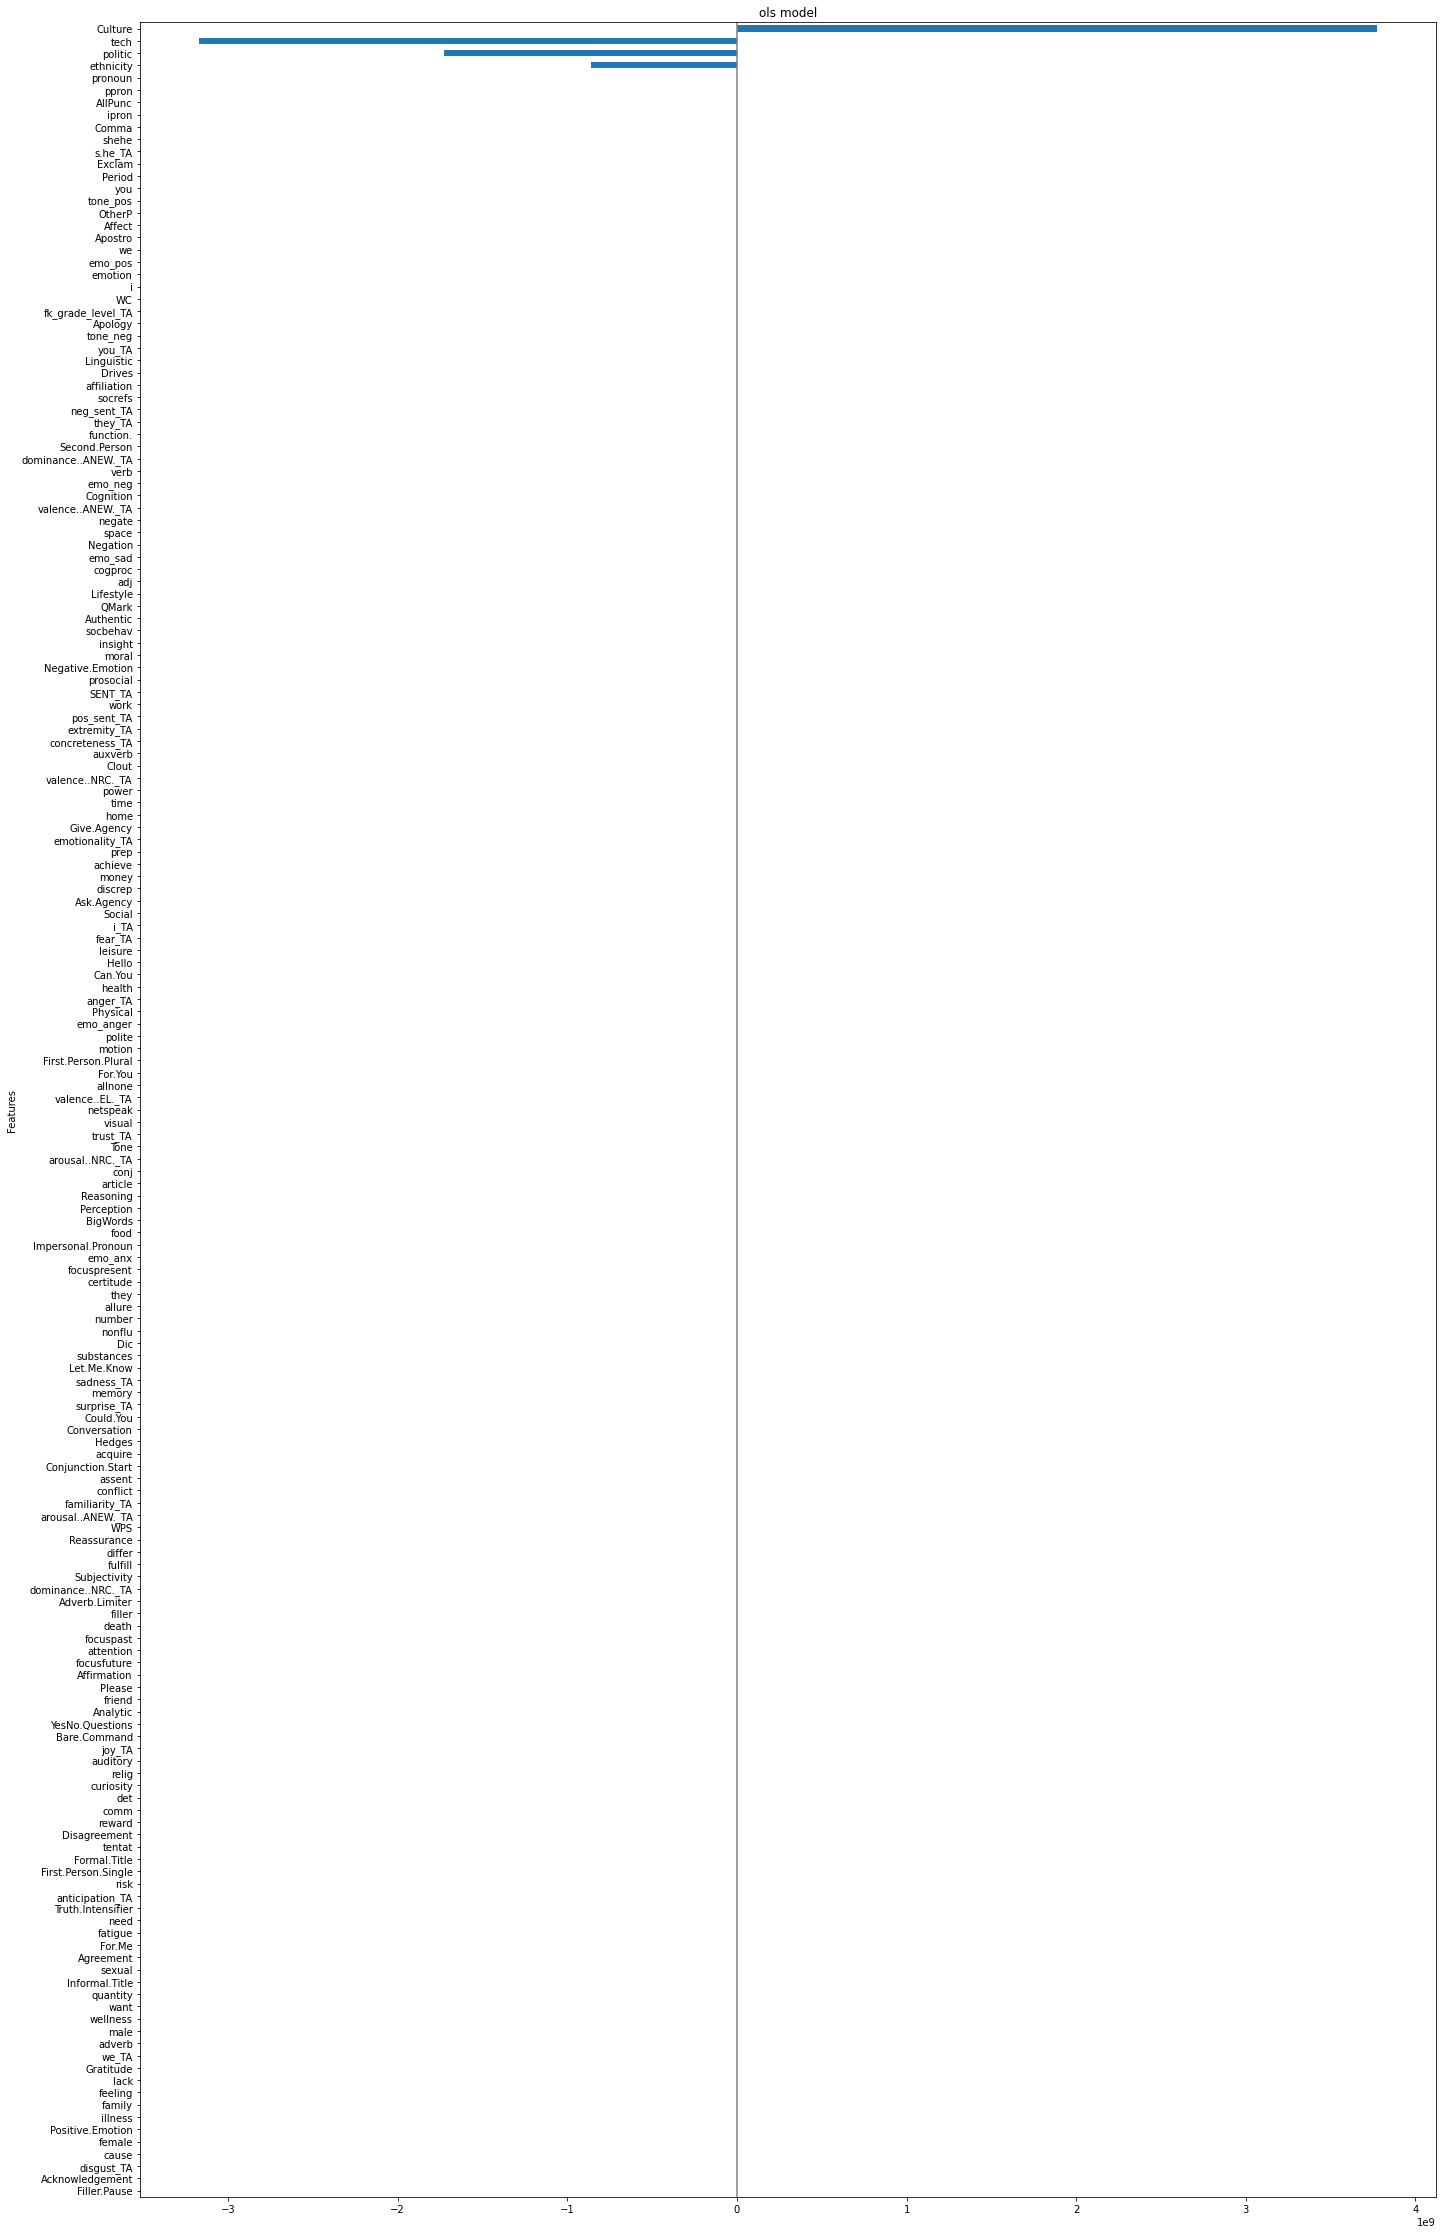

In [72]:
df_feature["Coefficient"].plot(kind='barh', figsize=(30, 40))
plt.title('ols model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [73]:
from sklearn.linear_model import Ridge, Lasso

In [74]:
rg1 = Ridge(alpha=0.001).fit(X_train, y_train)
rg1.predict(X_test)

array([  25.18473916,   -9.9675459 ,   -6.63092173,  -11.02692069,
         -1.55469867,    9.70901912,   17.845079  ,   14.88186034,
       -143.07525439,    9.07228634,    8.6802859 ,    6.78787296,
         20.52586532,   -7.46974717,   51.88743674,   25.91545332,
         10.79854949,   -2.4911485 ,   -9.27411945,   29.16913758,
         16.27963401,    2.95925345,   14.73093576,   -7.21116439,
         19.58259692,   14.544421  ,  -24.51844794,   15.22748984,
          2.54388062,   12.57610016,   22.76606496,   11.51942432,
         23.53698481,   36.55057693,   24.8171279 ,   31.31833894,
         10.60104826,   13.16104847,  -34.11313688,    8.41322994,
          5.0070472 ,   26.62785032,   31.42360213,   -7.27804468,
          7.25246154,    6.10266566,   27.29628402,    6.81257115,
         22.96520022,   26.87960689,   14.35261979,   36.59799636,
         37.55442417,    4.89339822,   22.2739341 ,    1.12785481,
         47.46001944,   36.60727287,   21.45479881,   20.03264

In [75]:
mean_squared_error(y_test, rg1.predict(X_test))

364.7776913005389

In [76]:
def match():
    pre_binary = []
    true = []
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * rg1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    for i in range(len(y_test)):
        if rg1.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
    return pre_binary, true

In [77]:
pre, true = match()

0.9102564102564102


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pre)

array([[15,  3],
       [ 5, 55]])

In [79]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(rg1.predict(X_test), y_test)

(0.6342085199188493, 4.5552251499613043e-10)

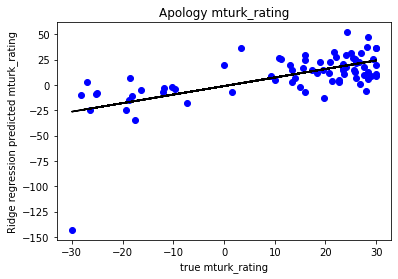

In [80]:
# Visualising the Test set results
theta = np.polyfit(y_test, rg1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, rg1.predict(X_test), color = 'blue')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('Ridge regression predicted mturk_rating')
plt.show()

In [81]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(rg1.coef_)
coeff_df["Magnitude"] = pd.Series(abs(rg1.coef_))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [82]:
df_feature

,Features,Coefficient,Magnitude
65,cause,0.003602,0.003602
104,illness,0.021802,0.021802
131,Conversation,0.023864,0.023864
94,ethnicity,-0.024211,0.024211
171,Gratitude,-0.024524,0.024524
...,...,...,...
72,tone_pos,32.447063,32.447063
42,you,35.036396,35.036396
38,pronoun,-37.431007,37.431007
24,s.he_TA,-43.635117,43.635117


In [83]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ols_rg.csv")

In [84]:
df_feature = df_feature.set_index("Features")

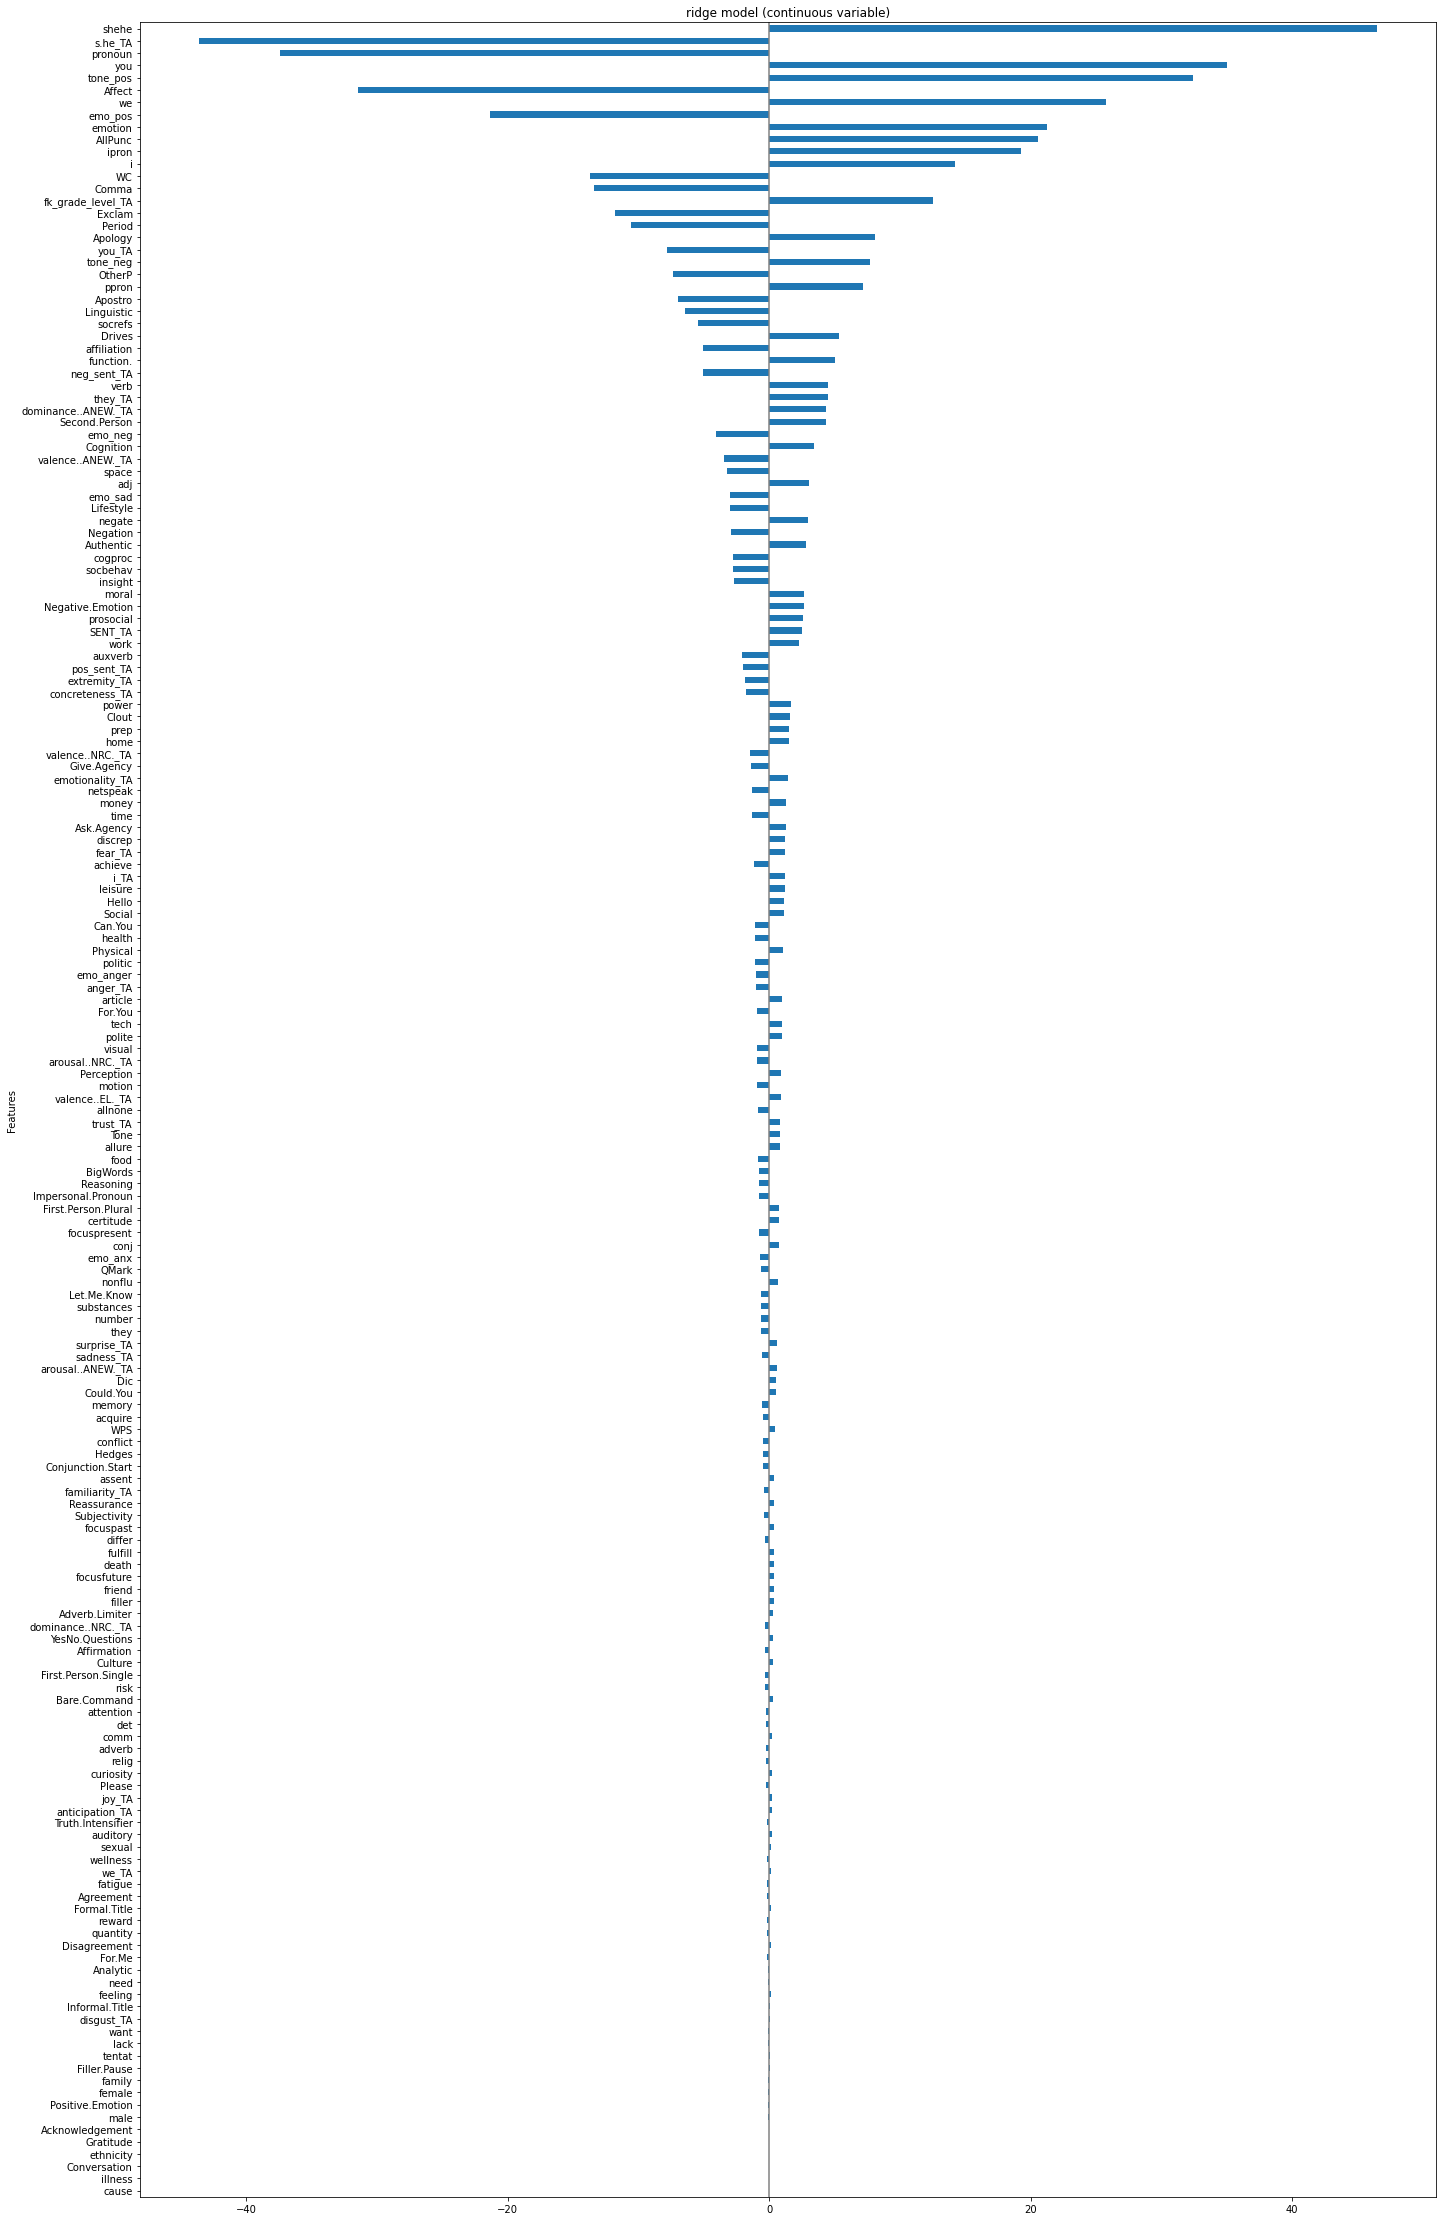

In [85]:
df_feature["Coefficient"].plot(kind='barh', figsize=(30, 40))
plt.title('ridge model (continuous variable)')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [86]:
lo1 = Lasso(alpha=0.5).fit(X_train, y_train)
lo1.predict(X_test)

array([ 21.23038455,  -1.56683744,  -9.14588842,  -5.63842728,
         0.30610339,   3.38370365,  12.63607978,  15.9654354 ,
       -32.22699912,  11.82031059,   8.63882779,   5.5809262 ,
         7.55880388,  -7.4247077 ,  46.83647447,  22.5699835 ,
         4.00538706,   2.49021934,  -2.51380639,  17.05591775,
        11.24064528,   5.58191917,  23.55715931,   5.60255749,
        19.49763176,   9.76195282, -12.70094047,  12.63142748,
        -4.51714133,  11.80992755,  17.95106574,   3.74035092,
        28.16084799,  39.07298601,  15.69488087,  30.06153378,
         9.91457777,   8.28974724, -19.01861451,  13.60344095,
         3.86581026,  16.15293602,  29.73966831,  -6.99990518,
         6.86919562,   1.30301891,  23.24739587,  -2.43070156,
         5.8217283 ,  24.37147612,  13.22651653,  31.36373595,
        37.95050118,   2.3940369 ,  13.61816805,   9.84053259,
        50.08170544,  37.92283163,  22.12658562,  12.90697682,
        25.92674291, -10.33413018, -13.92612594,  22.03

In [87]:
mean_squared_error(y_test, lo1.predict(X_test))

220.93865579020965

In [88]:
# matching same direction

In [89]:
def match():
    no_match = 0
    true = []
    pre_binary = []
    for i in range(len(y_test)):
        if y_test.to_list()[i] * lo1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    for i in range(len(y_test)):
        if lo1.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
    return pre_binary, true

In [90]:
pre, true = match()

0.9102564102564102


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pre)

array([[14,  4],
       [ 4, 56]])

In [92]:
#correlation between predicted y and true y

In [93]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(lo1.predict(X_test), y_test)

(0.6246694109955357, 9.838792991218242e-10)

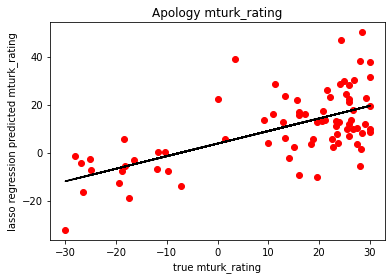

In [94]:
# Visualising the Test set results
theta = np.polyfit(y_test, lo1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, lo1.predict(X_test), color = 'red')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('lasso regression predicted mturk_rating')
plt.show()

In [95]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lo1.coef_)
coeff_df["Magnitude"] = pd.Series(abs(lo1.coef_))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending = True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [96]:
df_feature

,Features,Coefficient,Magnitude
167,Acknowledgement,-0.003872,0.003872
110,need,-0.015012,0.015012
14,joy_TA,-0.017650,0.017650
56,quantity,-0.024259,0.024259
70,memory,0.044134,0.044134
143,Hedges,-0.052893,0.052893
130,focusfuture,0.054550,0.054550
136,AllPunc,-0.060298,0.060298
13,fear_TA,0.065014,0.065014
176,Conjunction.Start,-0.068755,0.068755


In [97]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ols_ls.csv")

In [98]:
df_feature = df_feature.set_index("Features")

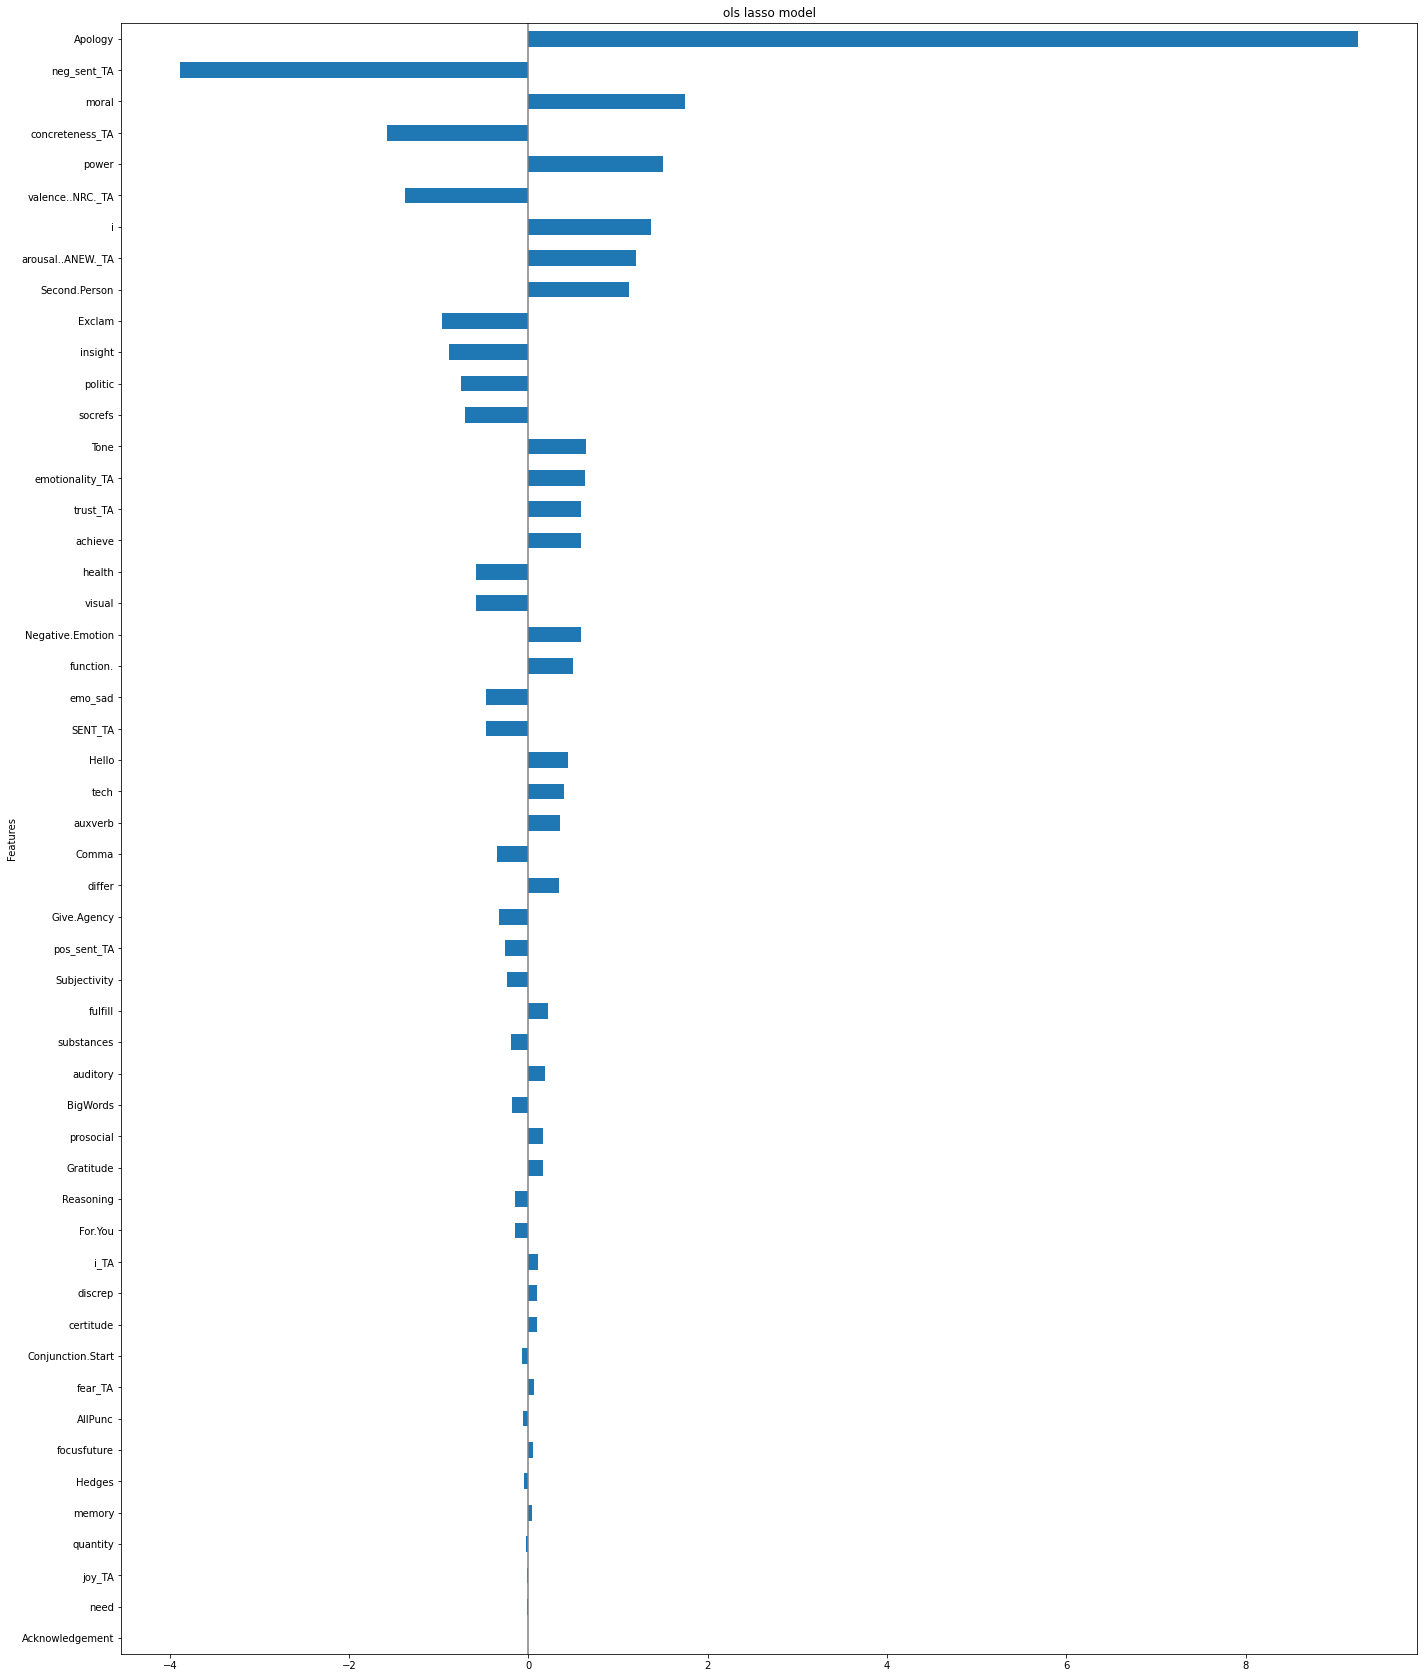

In [99]:
df_feature["Coefficient"].plot(kind='barh', figsize=(30, 30))
plt.title('ols lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)